In [118]:
import numpy as np
from matplotlib import pyplot as plt

import more_itertools as mit
from collections import deque

In [119]:
data_filename = 'day15_chiton.txt'
with open(data_filename) as datafile:
    data = [l.strip() for l in datafile.readlines()]

data_orig = np.array([[int(d) for d in row] for row in data])

In [120]:
data_ex = """\
1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581\
"""
data_ex = np.array([[int(d) for d in row] for row in data_ex.split('\n')])
data_ex

array([[1, 1, 6, 3, 7, 5, 1, 7, 4, 2],
       [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
       [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
       [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
       [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
       [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
       [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
       [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
       [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
       [2, 3, 1, 1, 9, 4, 4, 5, 8, 1]])

In [121]:
data_ex2 = """\
11637517422274862853338597396444961841755517295286
13813736722492484783351359589446246169155735727126
21365113283247622439435873354154698446526571955763
36949315694715142671582625378269373648937148475914
74634171118574528222968563933317967414442817852555
13191281372421239248353234135946434524615754563572
13599124212461123532357223464346833457545794456865
31254216394236532741534764385264587549637569865174
12931385212314249632342535174345364628545647573965
23119445813422155692453326671356443778246755488935
22748628533385973964449618417555172952866628316397
24924847833513595894462461691557357271266846838237
32476224394358733541546984465265719557637682166874
47151426715826253782693736489371484759148259586125
85745282229685639333179674144428178525553928963666
24212392483532341359464345246157545635726865674683
24611235323572234643468334575457944568656815567976
42365327415347643852645875496375698651748671976285
23142496323425351743453646285456475739656758684176
34221556924533266713564437782467554889357866599146
33859739644496184175551729528666283163977739427418
35135958944624616915573572712668468382377957949348
43587335415469844652657195576376821668748793277985
58262537826937364893714847591482595861259361697236
96856393331796741444281785255539289636664139174777
35323413594643452461575456357268656746837976785794
35722346434683345754579445686568155679767926678187
53476438526458754963756986517486719762859782187396
34253517434536462854564757396567586841767869795287
45332667135644377824675548893578665991468977611257
44961841755517295286662831639777394274188841538529
46246169155735727126684683823779579493488168151459
54698446526571955763768216687487932779859814388196
69373648937148475914825958612593616972361472718347
17967414442817852555392896366641391747775241285888
46434524615754563572686567468379767857948187896815
46833457545794456865681556797679266781878137789298
64587549637569865174867197628597821873961893298417
45364628545647573965675868417678697952878971816398
56443778246755488935786659914689776112579188722368
55172952866628316397773942741888415385299952649631
57357271266846838237795794934881681514599279262561
65719557637682166874879327798598143881961925499217
71484759148259586125936169723614727183472583829458
28178525553928963666413917477752412858886352396999
57545635726865674683797678579481878968159298917926
57944568656815567976792667818781377892989248891319
75698651748671976285978218739618932984172914319528
56475739656758684176786979528789718163989182927419
67554889357866599146897761125791887223681299833479\
"""
data_ex2 = np.array([[int(d) for d in row] for row in data_ex2.split('\n')])
data_ex2

array([[1, 1, 6, ..., 2, 8, 6],
       [1, 3, 8, ..., 1, 2, 6],
       [2, 1, 3, ..., 7, 6, 3],
       ...,
       [7, 5, 6, ..., 5, 2, 8],
       [5, 6, 4, ..., 4, 1, 9],
       [6, 7, 5, ..., 4, 7, 9]])

In [122]:
data = data_orig.copy()
data.shape

(100, 100)

In [123]:
np.unique(data)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Helper functions
### Exact solution
Works only on small arrays

In [124]:
def get_risk(data, directions):
    coords = directions.cumsum(axis=0)
    risks = data[tuple(zip(*coords))]
    return coords, risks.sum()

In [125]:
def exact_solution(data):
    base_directions = [(0,1)]*(data.shape[1]-1) + [(1,0)]*(data.shape[0]-1)
    best_score = 1e6
    for directions in mit.distinct_permutations(base_directions):
        coords, score = get_risk(data, np.array(directions))
        if score < best_score:
            best_score = score
            best_coords = coords
            best_directions = np.array(directions)
    return best_score, best_directions, best_coords

In [126]:
def plot_path(data, path=None):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.imshow(data)
    if path is not None:
        plt.scatter(*list(zip(*path))[::-1], alpha=1,
                    marker='s', facecolors='none', edgecolors='r')

### Swapping and plotting

In [10]:
def swap_two(arr):
    arr = arr.copy()
    idx1, idx2 = np.random.choice(len(arr), size=2)
    arr[[idx1, idx2]] = arr[[idx1, idx2]][::-1]
    return arr

29


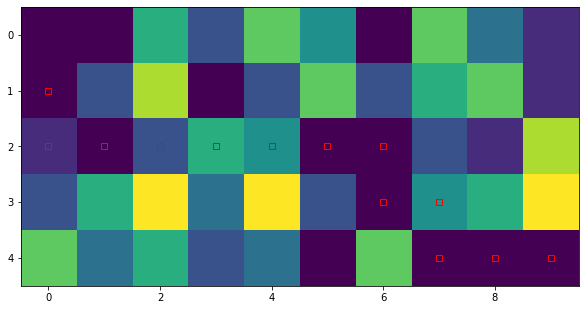

In [11]:
s, dirs, coords = exact_solution(data_ex[:5, :])
print(s)
plot_path(data_ex[:5, :], coords)

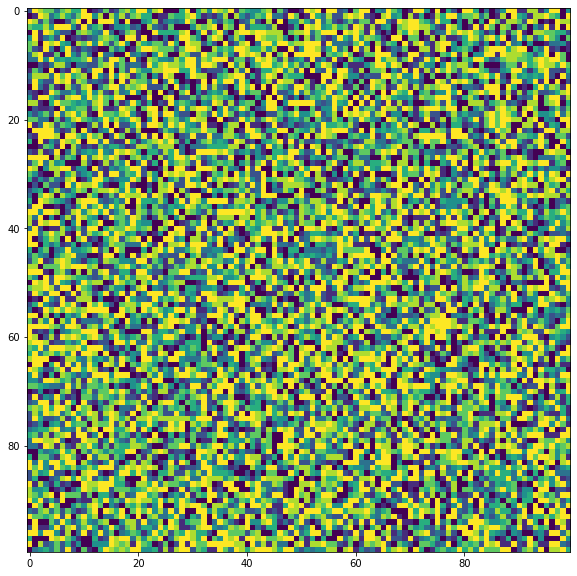

In [12]:
plot_path(data)

# Part 1

### New idea - keep just the memory of min costs to a point on the diagonal

In [13]:
data = data_orig.copy()

In [14]:
mem = []
costs = [0]
for col in range(1, data.shape[0]):
    new_costs = []
    for i in range(col + 1):
        j = col - i
        #print(i, j, end= ', ')
        cost = data[j, i]
        #print(cost)
        if i == 0:
            #print('only vertical i=0')
            new_costs.append(costs[0] + cost)
        elif j == 0:
            #print(f'only horizontal {i=}')
            new_costs.append(costs[-1] + cost)
        else:
            #print(f'choosing min from diagonal ({i-1} and {i})')
            min_cost = min(costs[i-1], costs[i])
            new_costs.append(min_cost + cost)

    costs = new_costs
    mem.append(costs)
    print(costs)

[1, 9]
[10, 3, 17]
[17, 11, 12, 24]
[18, 17, 14, 20, 31]
[23, 26, 20, 21, 24, 35]
[30, 32, 22, 28, 24, 30, 42]
[37, 38, 24, 31, 29, 25, 38, 50]
[41, 40, 25, 28, 37, 34, 26, 44, 56]
[45, 48, 27, 34, 34, 39, 35, 29, 48, 62]
[46, 49, 36, 36, 42, 37, 38, 38, 36, 55, 71]
[48, 47, 45, 38, 40, 46, 46, 41, 41, 45, 64, 72]
[52, 54, 48, 43, 40, 41, 52, 42, 42, 43, 46, 73, 74]
[55, 60, 52, 45, 49, 47, 46, 47, 44, 49, 52, 55, 78, 77]
[56, 64, 60, 46, 49, 52, 47, 55, 45, 47, 57, 56, 56, 85, 84]
[59, 65, 65, 54, 55, 57, 53, 56, 48, 53, 49, 63, 62, 65, 85, 86]
[64, 61, 69, 57, 58, 56, 61, 58, 53, 50, 56, 52, 67, 69, 74, 93, 89]
[72, 63, 62, 59, 60, 65, 59, 62, 59, 53, 54, 61, 56, 71, 70, 83, 94, 96]
[73, 71, 71, 61, 66, 69, 66, 61, 60, 59, 60, 57, 61, 63, 79, 72, 88, 102, 104]
[78, 74, 73, 70, 70, 68, 74, 70, 69, 63, 66, 61, 59, 70, 71, 76, 77, 89, 105, 110]
[85, 77, 75, 71, 76, 75, 69, 79, 75, 71, 67, 70, 60, 60, 77, 78, 77, 82, 98, 112, 119]
[94, 84, 80, 73, 77, 79, 73, 77, 77, 78, 69, 70, 63, 69, 

In [15]:
# Now backwards
costs2 = [data[-1, -1]]
mem2 = [costs2]
print(costs2)

for col in range(1, data.shape[0]):
    new_costs = []
    for i in range(col + 1):
        j = col - i
        #print(i, j, end= ', ')
        cost = data[-i-1, -j-1]
        if col == (data.shape[0] -1):
            cost = 0
        #print(cost)
        if i == 0:
            #print('only vertical i=0')
            new_costs.append(costs2[0] + cost)
        elif j == 0:
            #print(f'only horizontal {i=}')
            new_costs.append(costs2[-1] + cost)
        else:
            #print(f'choosing min from diagonal ({i-1} and {i})')
            min_cost = min(costs2[i-1], costs2[i])
            new_costs.append(min_cost + cost)

    costs2 = new_costs
    mem2.append(costs2)
    print(costs2)

[6]
[15, 9]
[23, 13, 14]
[31, 22, 22, 22]
[32, 31, 23, 26, 24]
[41, 33, 24, 32, 33, 26]
[45, 35, 25, 33, 34, 34, 35]
[53, 42, 30, 27, 34, 43, 43, 36]
[60, 51, 31, 32, 34, 35, 51, 45, 45]
[63, 53, 40, 35, 38, 43, 41, 52, 49, 51]
[64, 56, 46, 36, 43, 39, 49, 50, 58, 52, 60]
[73, 65, 50, 37, 39, 45, 45, 50, 52, 60, 61, 62]
[82, 67, 51, 41, 39, 48, 51, 54, 56, 59, 63, 64, 66]
[89, 69, 57, 46, 48, 41, 52, 60, 55, 65, 66, 66, 73, 69]
[96, 78, 59, 47, 51, 49, 50, 53, 64, 64, 70, 67, 74, 71, 73]
[103, 86, 60, 51, 50, 50, 57, 59, 54, 65, 72, 76, 72, 80, 75, 79]
[112, 95, 64, 56, 57, 57, 55, 61, 61, 60, 74, 81, 81, 77, 79, 80, 88]
[117, 98, 73, 62, 65, 63, 58, 57, 70, 66, 66, 75, 88, 84, 86, 82, 88, 90]
[125, 105, 80, 71, 71, 68, 66, 63, 62, 67, 71, 71, 84, 90, 92, 83, 83, 96, 95]
[131, 111, 89, 75, 79, 73, 71, 69, 63, 68, 70, 76, 72, 86, 91, 89, 92, 88, 102, 103]
[140, 118, 97, 83, 82, 80, 74, 77, 70, 70, 77, 72, 74, 78, 92, 98, 97, 96, 93, 109, 108]
[146, 123, 98, 92, 91, 89, 79, 78, 76, 71, 7

## That's correct!

In [16]:
(np.array(costs) + np.array(costs2)).min()

613

In [17]:
(np.array(costs) + np.array(costs2))

array([1115, 1051, 1025,  966,  960,  918,  895,  876,  863,  837,  828,
        836,  838,  804,  793,  799,  765,  744,  726,  723,  710,  701,
        704,  691,  692,  685,  686,  678,  678,  678,  681,  674,  655,
        645,  630,  625,  625,  625,  623,  622,  639,  648,  656,  643,
        634,  639,  633,  636,  642,  640,  632,  632,  620,  616,  617,
        618,  624,  630,  622,  619,  613,  613,  624,  632,  636,  636,
        632,  641,  633,  637,  645,  648,  647,  679,  681,  697,  711,
        700,  709,  722,  729,  729,  737,  767,  787,  798,  804,  798,
        803,  820,  848,  866,  865,  889,  927,  974,  978,  995, 1031,
       1110])

# Parts 2

In [127]:
def generate_part2(data):
    meta_data = []
    for i in range(5):
        meta_row = []
        for j in range(5):
            data_new = data.copy()
            for k in range(i+j):
                data_new = np.mod(data_new + 1, 10)
                data_new[data_new == 0] = 1
            meta_row.append(data_new)
        meta_data.append(meta_row)
    meta_data = np.array(meta_data)
    
    data_big = np.concatenate(np.concatenate(meta_data, axis=1), axis=1)
    return data_big

In [128]:
data = generate_part2(data_orig)

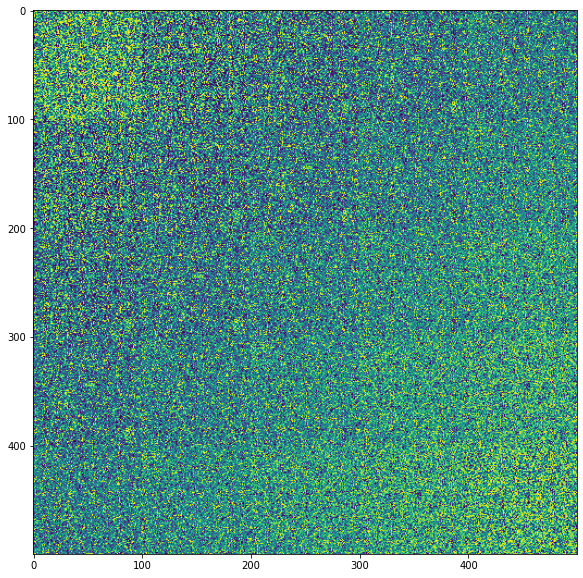

In [129]:
plot_path(data)

### Reimplement the method to take into account possibility of going backwards

### One more implementation of the same method

In [23]:
def get_diag_idx(col, data):
    ys = np.arange(col+1)
    xs = col - ys
    diff = col - data.shape[0] + 1
    if diff > 0:
        xs, ys = xs[diff:-diff], ys[diff:-diff]
    return xs, ys

In [23]:
def get_eff_costs(cum_costs):
    eff_costs = np.zeros(len(cum_costs)+1)
    eff_costs[0] = cum_costs[0]
    eff_costs[1:-1] = np.minimum(cum_costs[:-1], cum_costs[1:])
    eff_costs[-1] = cum_costs[-1]
    return eff_costs

In [24]:
def get_eff_costs_down(cum_costs):
    eff_costs = np.minimum(cum_costs[:-1], cum_costs[1:])
    return eff_costs

In [25]:
data = data_orig.copy()
data = data_big.copy()

In [26]:
cum_cost_arr = data.copy()
cum_cost_arr[0, 0] = 0

for col in range(1, data.shape[0]):
    cum_costs = cum_cost_arr[get_diag_idx(col-1, data)]
    #print(cum_costs)
    eff_cum_costs = get_eff_costs(cum_costs).astype(int)
    cum_cost_arr[get_diag_idx(col, data)] += eff_cum_costs
    
for col in range(data.shape[0], data.shape[0]*2):
    cum_costs = cum_cost_arr[get_diag_idx(col-1, data)]
    eff_cum_costs = get_eff_costs_down(cum_costs).astype(int)
    cum_cost_arr[get_diag_idx(col, data)] += eff_cum_costs
    #print(cum_costs)

In [27]:
cum_cost_arr_copy = cum_cost_arr.copy()

In [28]:
# Now run again, but consider both sides
for i in range(100):
    for col in range(1, data.shape[0]-1):
        cum_costs = cum_cost_arr[get_diag_idx(col-1, data)]
        eff_cum_costs = get_eff_costs(cum_costs).astype(int)
        #print(eff_cum_costs)

        cum_costs2 = cum_cost_arr[get_diag_idx(col+1, data)]
        eff_cum_costs2 = get_eff_costs_down(cum_costs2).astype(int)
        #print(eff_cum_costs2)

        eff_cum_costs = np.minimum(eff_cum_costs, eff_cum_costs2)

        costs = data[get_diag_idx(col, data)]
        cum_cost_arr[get_diag_idx(col, data)] = eff_cum_costs + costs


    col = data.shape[0] - 1
    cum_costs = cum_cost_arr[get_diag_idx(col-1, data)]
    eff_cum_costs = get_eff_costs(cum_costs).astype(int)
    #print(eff_cum_costs)
    cum_costs2 = cum_cost_arr[get_diag_idx(col+1, data)]
    eff_cum_costs2 = get_eff_costs(cum_costs2).astype(int)
    #print(eff_cum_costs2)
    eff_cum_costs = np.minimum(eff_cum_costs, eff_cum_costs2)
    costs = data[get_diag_idx(col, data)]
    cum_cost_arr[get_diag_idx(col, data)] = eff_cum_costs + costs


    for col in range(data.shape[0], data.shape[0]*2-2):
        cum_costs = cum_cost_arr[get_diag_idx(col-1, data)]
        eff_cum_costs = get_eff_costs_down(cum_costs).astype(int)

        cum_costs2 = cum_cost_arr[get_diag_idx(col+1, data)]
        eff_cum_costs2 = get_eff_costs(cum_costs2).astype(int)

        eff_cum_costs = np.minimum(eff_cum_costs, eff_cum_costs2)

        costs = data[get_diag_idx(col, data)]
        cum_cost_arr[get_diag_idx(col, data)] = eff_cum_costs + costs
    
    
    col = data.shape[0]*2 - 2
    cum_costs = cum_cost_arr[get_diag_idx(col-1, data)]
    eff_cum_costs = get_eff_costs_down(cum_costs).astype(int)
    costs = data[get_diag_idx(col, data)]
    cum_cost_arr[get_diag_idx(col, data)] = eff_cum_costs + costs

In [29]:
cum_cost_arr_copy - cum_cost_arr

array([[  0,   0,   0, ..., 562, 562, 562],
       [  0,   0,   0, ..., 526, 526, 526],
       [  0,   0,   0, ..., 520, 520, 520],
       ...,
       [613, 447, 451, ...,   3,   4,   3],
       [613, 447, 451, ...,   3,   3,   3],
       [613, 447, 455, ...,   3,   3,   3]])

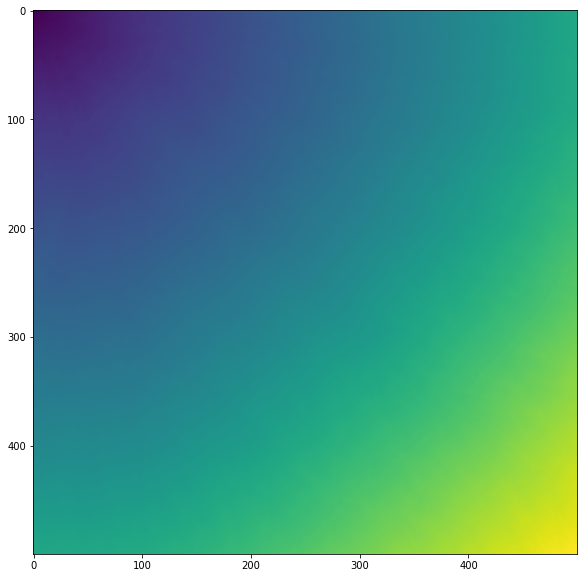

In [30]:
plot_path(cum_cost_arr)

In [31]:
cum_cost_arr[-1, -1]

2899

In [32]:
raise RuntimeError()

RuntimeError: 

## Try to implement Dijkstra's or similar

In [27]:
data_big = generate_part2(data_orig)

### First pure BFS, without sorting the queue
Runs very fast for part 1 (~100 ms) but takes 12-15 s for part 2

In [141]:
def solve(data):
    q = deque()
    q.append((0,0))
    costs = np.ones_like(data) * 1e6
    costs[0, 0] = 0
    dr = [-1, 0, 1, 0]
    dc = [0, -1, 0, 1]

    while q:
        r, c = q.popleft()
        cur_cost = costs[r, c]
        for i in range(4):
            rr = r + dr[i]
            cc = c + dc[i]
            if (0 <= rr < data.shape[0] and 0 <= cc < data.shape[1]):
                # We know that the point exists - is a neighbour
                cost = cur_cost + data[rr, cc]
                if cost < costs[rr, cc]:
                    costs[rr, cc] = cost
                    q.append((rr, cc))

    return costs[-1, -1]

In [142]:
%%timeit
solve(data_orig)

123 ms ± 5.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [143]:
print(solve(data_orig))

613.0


In [144]:
print(solve(data_big))

2899.0


### Now let's order the queue manually
This is actually a bit slower, about 2.5 times for part 1 and 10-15% for part 2

In [145]:
def solve(data):
    q = deque()
    q.append((0, 0, 0))
    paths = {}
    costs = np.ones_like(data) * 1e6
    costs[0, 0] = 0
    dr = [-1, 0, 1, 0]
    dc = [0, -1, 0, 1]

    while q:
        r, c, cur_cost = q.popleft()
        for i in range(4):
            rr = r + dr[i]
            cc = c + dc[i]
            if (0 <= rr < data.shape[0] and 0 <= cc < data.shape[1]):
                # We know that the point exists - is a neighbour
                cost = cur_cost + data[rr, cc]
                if cost < costs[rr, cc]:
                    costs[rr, cc] = cost
                    q.append((rr, cc, cost))
        q = deque(sorted(q, key=lambda x: x[2]))

    return costs[-1, -1]

In [146]:
%%timeit
solve(data_orig)

270 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [147]:
print(solve(data_big))

2899.0


### Let's use a proper priority queue

Using the heapq directly, part1 is the same speed and part 2 even faster

In [148]:
#from queue import PriorityQueue
from heapq import heappush, heappop

In [156]:
def solve(data):
    #q = PriorityQueue()
    #q.put((0, 0, 0)
    q = [(0, 0, 0)]
    paths = {}
    costs = np.ones_like(data) * 1e6
    costs[0, 0] = 0
    dr = [-1, 0, 1, 0]
    dc = [0, -1, 0, 1]

    #while not q.empty():
    while q:
        #cur_cost, r, c = q.get()
        cur_cost, r, c = heappop(q)
        for i in range(4):
            rr = r + dr[i]
            cc = c + dc[i]
            if (0 <= rr < data.shape[0] and 0 <= cc < data.shape[1]):
                # We know that the point exists - is a neighbour
                cost = cur_cost + data[rr, cc]
                if cost < costs[rr, cc]:
                    costs[rr, cc] = cost
                    #q.put((cost, rr, cc))
                    heappush(q, (cost, rr, cc))

    return costs[-1, -1]

In [157]:
%%timeit
solve(data_orig)

114 ms ± 3.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [158]:
solve(data_big)

2899.0

### Now A*
Surprisingly much faster than Dijkstra (2 times) for part 1 and 2 with weight = 1. The average cost (cel value) is 4.8 so I'm not sure why this is the best scaling, but it seems faster than other values

In [195]:
def dist(r, c, data, weight=1):
    dist = data.shape[0] - r + data.shape[1] - c - 2
    return weight*dist

def solve(data, weight=1):
    q = [(dist(0, 0, data), 0, 0)]
    paths = {}
    costs = np.ones_like(data) * 1e6
    costs[0, 0] = 0
    dr = [-1, 0, 1, 0]
    dc = [0, -1, 0, 1]

    while q:
        _, r, c = heappop(q)
        cur_cost = costs[r, c]
        for i in range(4):
            rr = r + dr[i]
            cc = c + dc[i]
            if (0 <= rr < data.shape[0] and 0 <= cc < data.shape[1]):
                # We know that the point exists - is a neighbour
                cost = cur_cost + data[rr, cc]
                if cost < costs[rr, cc]:
                    costs[rr, cc] = cost
                    h = dist(rr, cc, data, weight)
                    heappush(q, (cost + h, rr, cc))

    return costs[-1, -1]

In [187]:
%%timeit
solve(data_orig)

50.7 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [196]:
%%timeit
solve(data_big)

1.46 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [197]:
%%timeit
solve(data_big, 1.5)

1.54 s ± 61.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [198]:
%%timeit
solve(data_big, 2)

1.6 s ± 58.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [199]:
%%timeit
solve(data_big, .5)

1.48 s ± 79.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Previous (incorrect) version of the cost-keeeping solution for Part 2
I tried to make it possible to go back (up or left) once

In [ ]:
def get_diag(col, data):
    ys = np.arange(col+1)
    xs = col - ys
    return data[xs, ys]

In [ ]:
def get_eff_costs(cum_costs):
    eff_costs = np.zeros(len(cum_costs)+1)
    eff_costs[0] = cum_costs[0]
    eff_costs[1:-1] = np.minimum(cum_costs[:-1], cum_costs[1:])
    eff_costs[-1] = cum_costs[-1]
    return eff_costs

In [ ]:
cum_costs = np.array([0])
costs = np.array([0])
prev_costs = costs

for col in range(1, data.shape[0]):
    correct = False
    while not correct:
        correct = True
        #print(f'previous {cum_costs=}')
        
        costs = get_diag(col, data) # len+1
        #print(f'{costs=}')
        
        eff_costs = get_eff_costs(cum_costs)
        #print(f'{eff_costs=}')
        
        prev_cum_costs = cum_costs # len
        cum_costs = eff_costs + costs # len+1
        #print(f'new {cum_costs=}')
        
        # if any of the previous diagonal costs are higher than the new ones
        # then we could've reached them by going up/left from the current row
        # we need to amend them and repeat the step
        #print(f'{prev_costs=}')
        #print(cum_costs[1:] + prev_costs, prev_cum_costs)
        #print(cum_costs[:-1] + prev_costs, prev_cum_costs)
            
        if ((cum_costs[1:] + prev_costs < prev_cum_costs).any() or
            (cum_costs[:-1] + prev_costs < prev_cum_costs).any()):
            correct = False
            print('There\'s an easier way')
            
            # Now let's correct the previous cum_costs and re-run this step
            cum_costs = np.minimum(
                np.minimum(cum_costs[1:] + prev_costs, cum_costs[:-1] + prev_costs),
                prev_cum_costs
            )
        else:
            #print('No easier route')
            prev_costs = costs
            
        #print()

In [ ]:
def get_diag_back(col, data):
    ys = np.arange(col+1)
    xs = col - ys
    return data[-xs-1, -ys-1]

In [ ]:
def get_diag_back(col, data):
    ys = np.arange(col+1)
    xs = col - ys
    return data[-xs-1, -ys-1]

In [ ]:
# Now backwards
costs2 = data[-1:, -1:].reshape(-1)
cum_costs2 = costs2
prev_costs = costs2

for col in range(1, data.shape[0]):
    correct = False
    while not correct:
        correct = True
        #print(f'previous {cum_costs2=}')
        
        costs2 = get_diag_back(col, data) # len+1
        #print(f'{costs2=}')
        
        eff_costs = get_eff_costs(cum_costs2)
        #print(f'{eff_costs=}')
        
        prev_cum_costs = cum_costs2 # len
        cum_costs2 = eff_costs + costs2 # len+1
        #print(f'new {cum_costs2=}')
        
        # if any of the previous diagonal costs are higher than the new ones
        # then we could've reached them by going up/left from the current row
        # we need to amend them and repeat the step
        if ((cum_costs2[1:] + prev_costs < prev_cum_costs).any() or
            (cum_costs2[:-1] + prev_costs < prev_cum_costs).any()):
            correct = False
            print('There\'s an easier way')
            
            # Now let's correct the previous cum_costs2 and re-run this step
            cum_costs2 = np.minimum(
                np.minimum(cum_costs2[1:] + prev_costs, cum_costs2[:-1] + prev_costs),
                prev_cum_costs
            )
        else:
            #print('No easier route')
            prev_costs = costs2

In [ ]:
(cum_costs + cum_costs2).min()

In [ ]:
len(cum_costs + cum_costs2)

In [ ]:
plt.plot(cum_costs + cum_costs2)

# Old approaches

### Random perturbations

In [ ]:
#%%timeit
#get_risk(data_orig, directions)

In [ ]:
directions = np.array([(0,1)]*99 + [(1,0)]*99)

min_score1 = 1e6
for i in range(200_000):
    np.random.shuffle(directions)
    path, score = get_risk(data, directions)
    if score < min_score1:
        print('\nNew best cost:', score)
        min_score1 = score
        best_directions1 = directions.copy()
        best_path1 = path.copy()
    if (i % 100) == 0:
        print('.', end='')

In [ ]:
print(min_score1)
plot_path(data, best_path1)

### Small perturbations

In [ ]:
np.random.randint(0, 1)

In [ ]:
#directions = np.array([(1,0)]*99 + [(0,1)]*99)
directions = save2.copy()

#min_score2 = 1e6
min_score2 = min_score2 + 200
for i in range(100_000):
    new_directions = directions.copy()
    for j in range(np.random.randint(0,11)):
        new_directions = swap_two(new_directions)
    path, score = get_risk(data, new_directions)
    if score < min_score2:
        print('\nNew best cost:', score)
        directions = new_directions
        min_score2 = score
        best_path2 = path.copy()
    if (i % 100) == 0:
        print('.', end='')
best_directions2 = directions

In [ ]:
#save2 = best_directions2

In [ ]:
get_risk(data, save2)[1]

In [ ]:
print(min_score2)
plot_path(data, best_path2)

In [ ]:
min_score2/len(best_path2)

In [ ]:
def improve_iteratively(data, directions, n_steps=15):
    coords, score = get_risk(data, directions)
    improvements = True
    
    while improvements:
        improvements = False
        for start in range(n_steps):
            for idx_start in range(start, len(directions), n_steps):
                sample = coords[idx_start: idx_start+n_steps]
                x1,y1,x2,y2 = *sample[0], *sample[-1]
                sub_data = data[x1:x2+1, y1:y2+1]
                sub_coords = sample - (x1, y1)
                sub_score = sub_data[tuple(zip(*sub_coords))][1:].sum()

                s, d, c = exact_solution(sub_data)
                if s < sub_score:
                    print(f'Improvement in index {idx_start} to {idx_start + n_steps}: from {sub_score} to {s}')
                    coords[idx_start+1 : idx_start+n_steps] = c + (x1, y1)
                    directions[idx_start+1 : idx_start+n_steps] = d
                    improvements = True
        score = data[tuple(zip(*coords))].sum()
    return score, directions, coords

In [ ]:
directions = save2.copy()
coords, score = get_risk(data, directions)
print(score)

In [ ]:
directions = np.array(list(zip([(0,1)]*99, [(1,0)]*99))).reshape(198, 2)
coords, score = get_risk(data, directions)
print(score)

In [ ]:
score = 1e6
while score > 1000:
    #directions = np.array([(0,1)]*99 + [(1,0)]*99)
    directions = np.array([(1,0)]*99 + [(0,1)]*99)

    for i in range(30):
        directions = swap_two(directions)

    coords, score = get_risk(data, directions)
print(score)

In [ ]:
#for i in range(30):
#    directions = swap_two(directions)
#coords, score = get_risk(data, directions)
#print(score)

In [ ]:
min_score = 1e6
for n_swaps in range(30, 5, -5):
    for i in range(5_000):
        new_directions = directions.copy()
        for j in range(n_swaps):
            new_directions = swap_two(new_directions)
        path, score = get_risk(data, new_directions)
        if score < min_score:
            print('\nNew best cost:', score)
            directions = new_directions
            min_score = score
            best_path = path.copy()
        if (i % 100) == 0:
            print('.', end='')

In [ ]:
score, directions, coords = improve_iteratively(data, directions, 15)

In [ ]:
print(score)
plot_path(data, coords)

In [ ]:
directions = best_directions3.copy()

min_score4 = min_score3 + 150
for i in range(200_000):
    new_directions = directions.copy()
    for j in range(3):
        new_directions = swap_two(new_directions)
    path, score = get_risk(data, new_directions)
    if score < min_score4:
        print('\nNew best cost:', score)
        directions = new_directions
        min_score4 = score
        best_path4 = path.copy()
    if (i % 100) == 0:
        print('.', end='')
best_directions4 = directions

In [ ]:
print(min_score4)
plot_path(data, best_path4)

In [ ]:
directions = best_directions4.copy()

min_score5 = min_score4 + 100
for i in range(200_000):
    new_directions = directions.copy()
    for j in range(2):
        new_directions = swap_two(new_directions)
    path, score = get_risk(data, new_directions)
    if score < min_score5:
        print('\nNew best cost:', score)
        directions = new_directions
        min_score5 = score
        best_path5 = path.copy()
    if (i % 100) == 0:
        print('.', end='')
best_directions5 = directions

In [ ]:
print(min_score5)
plot_path(data, best_path5)

## Random(ish) walk

In [ ]:
def get_neighbours(data, pos):
    neighbours = (
        pos + (0,1),
        pos + (1,0),
        #(pos + (0,-1)
        #(pos + (-1,0)
    )
    neighbours = tuple(n for n in neighbours if (n<100).all())
    costs = data[tuple(np.array(neighbours).T)]
    return neighbours, costs

In [ ]:
#pos = np.array((20,50))
#options, costs = get_neighbours(data, pos)

In [ ]:
min_cost = 1000
#best_path = [np.array([0,0])]
best_path = [np.array(p) for p in best_path1]

for i in range(10_000):
    start = np.random.randint(0, len(best_path))
    pos = best_path[start]
    path = best_path[:start+1]
    cost = data[tuple(zip(*path))].sum()
    
    while (pos != (99, 99)).any():
        options, costs = get_neighbours(data, pos)
        probs = costs/costs.sum()
        idx = np.random.choice(len(options), p=probs, replace=False)
        pos = options[idx]
        cost += costs[idx]
        path.append(pos)
        if cost > min_cost:
            break
    if (i % 100) == 0:
        print('.', end='')
    if cost < min_cost:
        print('\nNew best cost:', cost)
        min_cost = cost
        best_path = path

In [ ]:
plot_path(data, best_path)

### Another approach

In [ ]:
n_bits = 19
n_steps = 19
n_chunks = int(np.ceil(99/n_bits))# + 4
n_chunks = int(np.ceil(99/n_steps)) + 10
n_chunks = 1

perm_coords = [np.array([0, 0])]
#perm_score = 0
for j in range(n_chunks):
    base_directions = np.array([(0,1)] * n_bits)
    best_coords = []
    best_score = 1000
    
    for i in range(2**n_bits):
        mods = [bool(int(d)) for d in format(i, f'0{n_bits}b')]
        directions = base_directions.copy()
        directions[mods] = (1, 0)
        coords = perm_coords[-1] + directions.cumsum(axis=0)
        score = data[tuple(zip(*coords))].sum()
        if score < best_score:
            best_score = score
            best_coords = coords
            best_directions = directions
            
    perm_coords.extend(best_coords[:n_steps])
    #perm_score += score
    
perm_score = data[tuple(zip(*perm_coords))][:1].sum()

In [ ]:
best_score

In [ ]:
print(best_score)
print(best_coords[-1])
plot_path(data, best_coords)

In [ ]:
print(len(perm_coords), perm_score, perm_score/len(perm_coords))
plot_path(data, perm_coords)

In [ ]:
y, x = [99,99] - perm_coords[-1]
x,y

### Now backwards

In [ ]:
n_bits = 19
n_steps = 5
#n_chunks = int(np.ceil(99/n_bits))
n_chunks = int(np.ceil(99/n_steps))
n_chunks = 1

perm_coords2 = [np.array([99, 99])]
#perm_score = 0
for j in range(n_chunks):
    base_directions = np.array([(0,1)] * n_bits)
    best_coords = []
    best_score = 1000
    
    for i in range(2**n_bits):
        mods = [bool(int(d)) for d in format(i, f'0{n_bits}b')]
        directions = base_directions.copy()
        directions[mods] = (1, 0)
        coords = perm_coords2[-1] - directions.cumsum(axis=0)
        score = data[tuple(zip(*coords))].sum()
        if score < best_score:
            best_score = score
            best_coords = coords
            best_directions = directions
            
    perm_coords2.extend(best_coords[:n_steps])
    #perm_score += score

In [ ]:
print(best_score)
print(best_coords[-1])
plot_path(data, best_coords)

In [ ]:
#print(len(perm_coords), perm_score, perm_score/len(perm_coords))
plot_path(data, perm_coords2)

In [ ]:
coords = np.concatenate((perm_coords, perm_coords2[47::-1]))
directions = np.diff(coords, axis=0)
plot_path(data, coords)